In [2]:
import librosa  
import librosa.display  
import numpy as np  
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler  
from sklearn.decomposition import PCA  
import matplotlib.pyplot as plt  
from sklearn.cluster import KMeans  
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster,cut_tree

In [3]:
classBinary=np.load('data\labelBinary.npy',allow_pickle=True)
classMulti=np.load('data\labelMulti.npy',allow_pickle=True)
classWho=np.load('data\labelWho.npy',allow_pickle=True)

dataB=np.load('data\mfccmeanData.npy',allow_pickle=True)

scaler=StandardScaler()
data_scaler = scaler.fit_transform(dataB)  
pca = PCA(n_components=2)
data_pca = pca.fit_transform(dataB)  

pca_scaler=StandardScaler()
data_pca_scaler= pca_scaler.fit_transform(data_pca)  
scaler_pca = PCA(n_components=2)
data_scaler_pca = scaler_pca.fit_transform(data_scaler)  


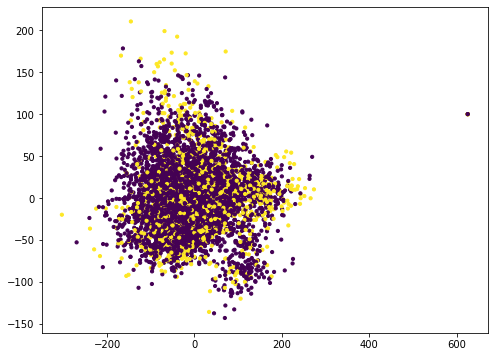

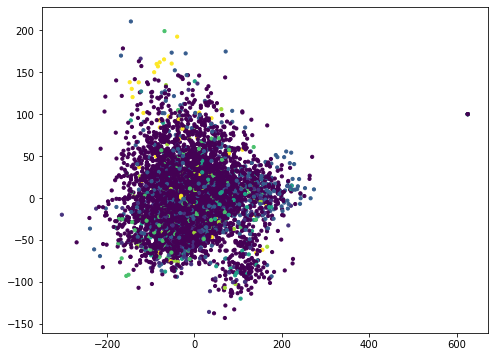

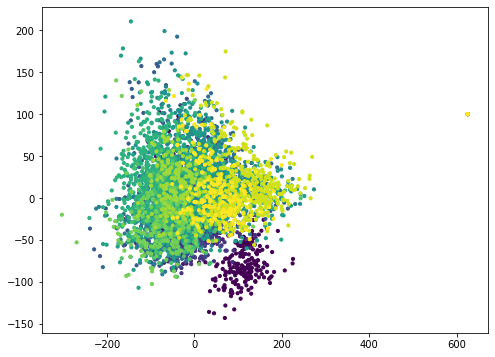

In [4]:
plotx=data_pca
plt.figure(figsize=(8, 6))
plt.scatter(plotx[:, 0], plotx[:, 1], c=classBinary, s=10, cmap='viridis')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(plotx[:, 0], plotx[:, 1], c=classMulti, s=10, cmap='viridis')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(plotx[:, 0], plotx[:, 1], c=classWho, s=10, cmap='viridis')
plt.show()

In [5]:
def kmeans_plot(plotx,train_data,n_clusters,name=''):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(train_data) 
    plt.figure(figsize=(8, 6))
    plt.scatter(plotx[:, 0], plotx[:, 1], c=kmeans.labels_, s=10, cmap='viridis')
    plt.title('K-Means Clustering')
    plt.show()

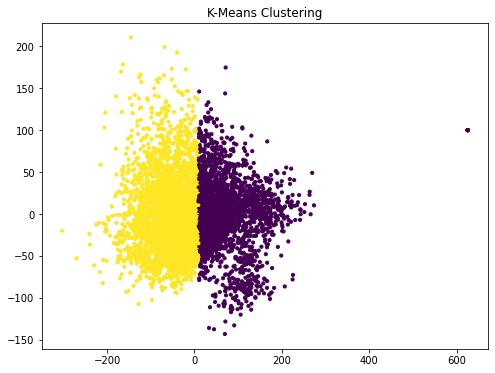

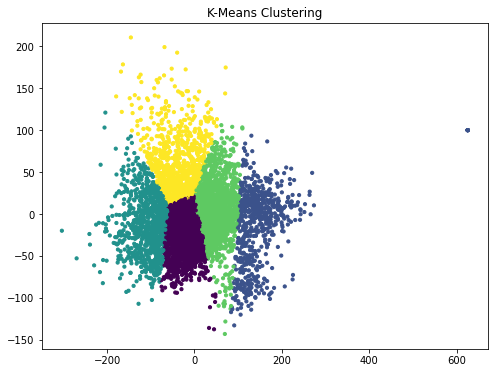

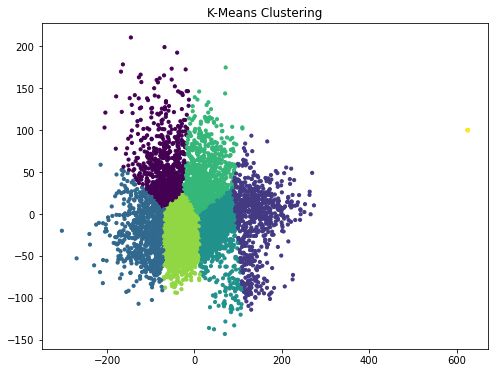

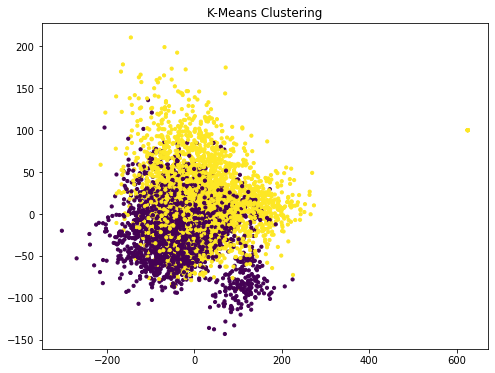

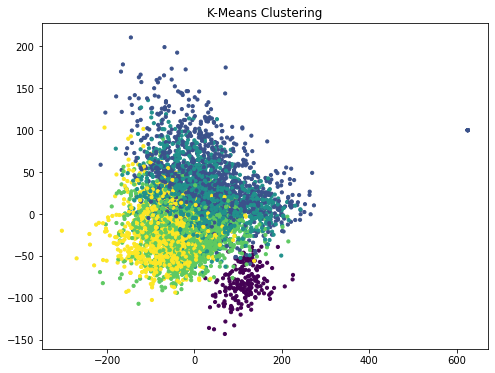

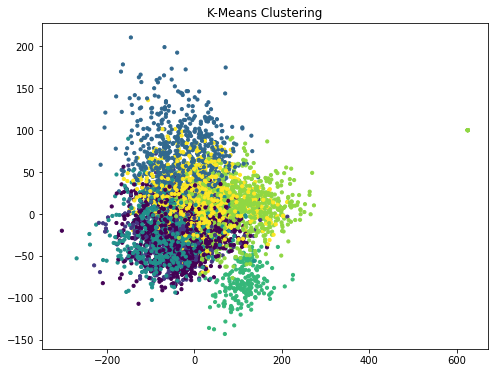

In [6]:
kmeans_plot(data_pca,data_pca,n_clusters=2)
kmeans_plot(data_pca,data_pca,n_clusters=5)
kmeans_plot(data_pca,data_pca,n_clusters=7)

kmeans_plot(data_pca,data_scaler,n_clusters=2)
kmeans_plot(data_pca,data_scaler,n_clusters=5)
kmeans_plot(data_pca,data_scaler,n_clusters=7)

In [7]:
def hierarchical_plot(plotx,train_data,name='',distance_threshold=0.5):
    Z=linkage(train_data,method='complete')
    plt.figure(figsize=(100, 7))  
    dendrogram(Z)  
    plt.show()  
    distance_threshold=0.5
    lables_train = fcluster(Z, distance_threshold, criterion='distance') 
    plt.figure(figsize=(8, 6))
    plt.scatter(plotx[:, 0], plotx[:, 1], c=lables_train, s=10, cmap='viridis')
    plt.title('hierarchical')
    plt.show()

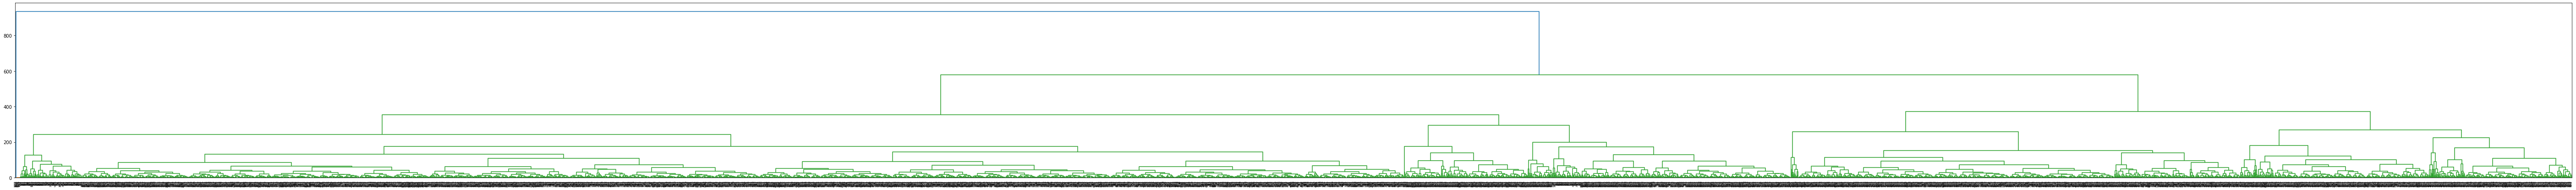

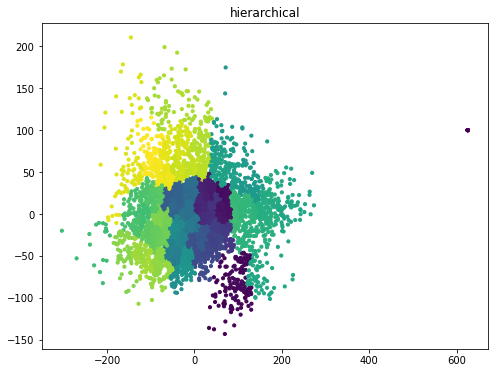

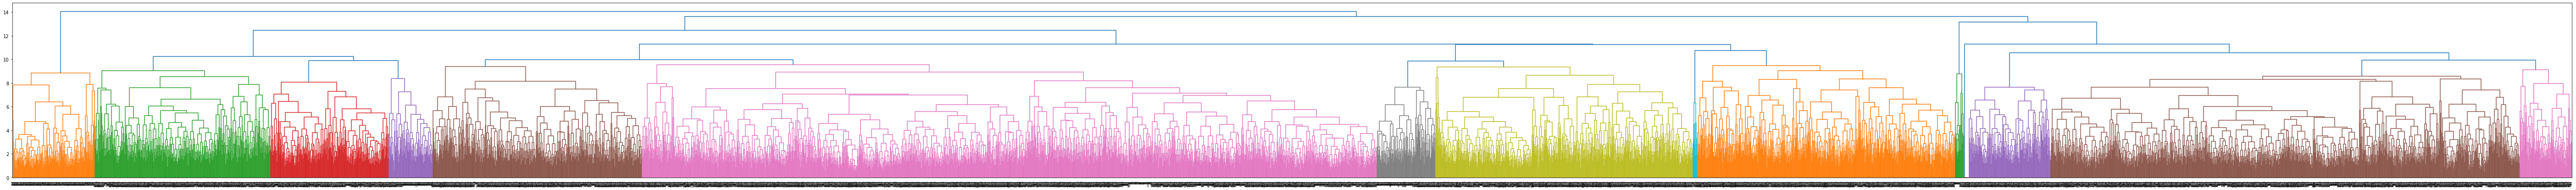

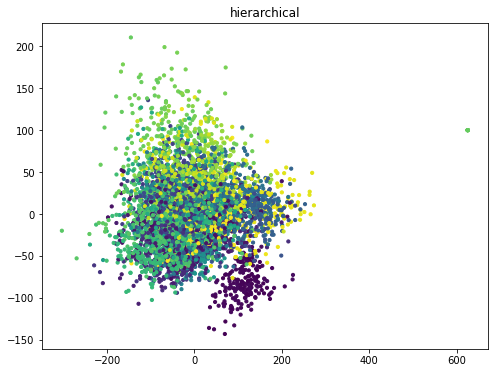

In [8]:
hierarchical_plot(data_pca,data_pca)
hierarchical_plot(data_pca,data_scaler)

C:\anaconda3\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


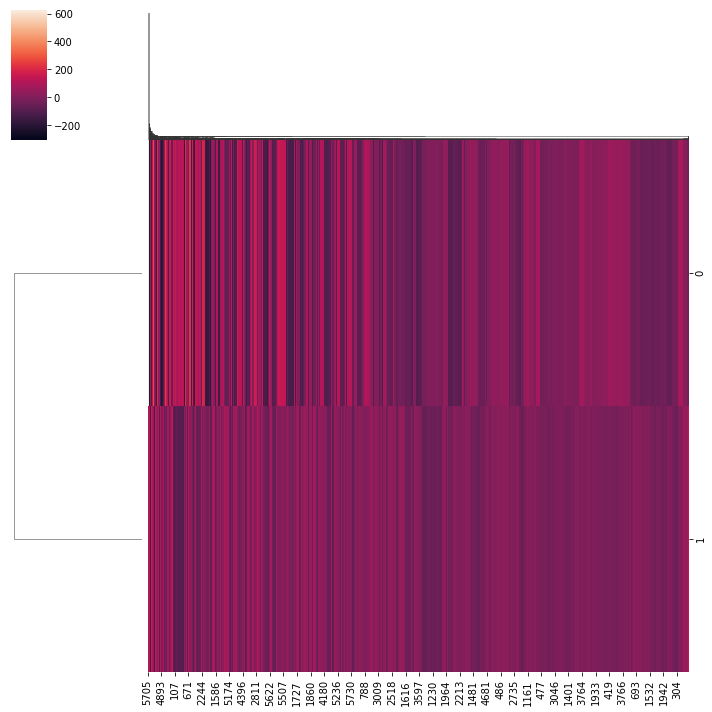

In [4]:
sns.clustermap(data_pca.T,method='single',metric='euclidean')

In [ ]:
classBinary=np.load('data\labelBinary.npy',allow_pickle=True)[:1000]
classMulti=np.load('data\labelMulti.npy',allow_pickle=True)[:1000]
classWho=np.load('data\labelWho.npy',allow_pickle=True)[:1000]

dataB=np.load('data\mfccmeanData.npy',allow_pickle=True)[:1000][:1000]

scaler=StandardScaler()
data_scaler = scaler.fit_transform(dataB)  
pca = PCA(n_components=2)
data_pca = pca.fit_transform(dataB)  

pca_scaler=StandardScaler()
data_pca_scaler= pca_scaler.fit_transform(data_pca)  
scaler_pca = PCA(n_components=2)
data_scaler_pca = scaler_pca.fit_transform(data_scaler)  
sns.clustermap(data_scaler.T,method='single',metric='euclidean')